## Leitura, Processamento de Datasets e Interface Gráfica

* __key name__: Tpc8
* __Título__: Processamento de datasets e Interface Gráfica
* __Data Inicial__: 2021-12-02
* __Data Fim__: 2021-12-09
* __Supervisor__: José Carlos Ramalho,  https://www.di.uminho.pt/~jcr/
* __Autor__: Mariana Gomes Martins, A97465 <p>
* __Resumo__:<p>
    Este ficheiro resolve o problema proposto e tem como objetivo: a leitura, o processamento e a obtenção de dados estatísticos de um dataset previamente fornecido, acompanhado pela interface gráfica mais adequada.
   
    O modelo corresponde a uma base de dados que consiste numa lista de exames médicos. Cada exame, por sua vez, está definido como sendo uma lista (EMD = [id, nome, data, idade, genero, morada, modalidade, clube, email, federado, resultado]). <p>
    Começamos com a função *lerDataset()* que permite a leitura/carregamento da informação do ficheiro. <p>
    De seguida, a função *listarDataset()* que faz a listagem no monitor dos vários registos de informação.<p>
    Temos ainda, as funções: *consultarDataset()* que, mediante o id de um EMD, retorna toda a sua informação; *modalidades()*, função que dá como resultado uma lista de modalidades ordenada alfabeticamente e sem repetições.<p>
     Para além disso, temos as funções de distribuição, *distribPorModalidade()*, *distribPorClube()* e *distribPorAno()* que resultam numa lista de pares, modalidade, clube ou ano, respetivamente, e número de exames médicos registados. São ainda acompanhadas pelos correspondentes gráficos de barras, obtidos com o auxílio do módulo *matplotlib.pyplot*. <p>
     Por último, através do módulo *PySimpleGUI*, foi desenvolvida uma interface gráfica com as principais funções anteriormente referidas, pelo que o modelo mais adequado resulta num painel com duas colunas, uma para o menu e outra para os dados. <p>
    

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de exames médicos desportivos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
_id,index,dataEMD,nome/primeiro,nome/último,idade,género,morada,modalidade,clube,email,federado,resultado
6045074cd77860ac9483d34e,0,2020-02-25,Delgado,Gay,28,F,Gloucester,BTT,ACRroriz,delgado.gay@acrroriz.biz,true,true
6045074ca6adebd591b5d239,1,2019-07-31,Foreman,Prince,34,M,Forestburg,Ciclismo,ACDRcrespos,foreman.prince@acdrcrespos.org,false,true
6045074c221e2fdf430e9ef0,2,2021-01-06,Cheryl,Berger,21,M,Umapine,Basquetebol,Vitoria,cheryl.berger@vitoria.biz,false,true
6045074c529cbdce549d3923,3,2020-11-19,Graves,Goff,29,F,Babb,Andebol,AVCfamalicão,graves.goff@avcfamalicão.co.uk,false,false
6045074c3319a0f9e79aad87,4,2019-09-01,Mckay,Bolton,29,F,Chilton,Futebol,ACDRcrespos,mckay.bolton@acdrcrespos.me,false,false
6045074c222607e7520ffd24,5,2019-10-07,Marla,Kelley,22,M,Clarence,Atletismo,AmigosMontanha,marla.kelley@amigosmontanha.tv,false,false

...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

Nota: os valores do campo id são demasiado complexos para serem usados na aplicação pelo utilizador.

Ideia: Cria ids novos, mais simples, tipo: emd00001, emd00002, ..., emd00100, ...

In [1]:
# Descreve em texto o teu 

# BdEMD = [EMD]
# EMD = [id, nome(concatenar os 2 nomes), data, idade, genero, morada, modalidade, clube, email, federado(booleano), resultado] 

# Leitura/carregamento da informação do ficheiro

#O resultado de uma comparação é sempre um valor booleano; obrigatoriamente retorna valor boolenao
def convBool(v):
    return v == 'true'
    

def lerDataset(fnome):
    f = open(fnome, encoding="utf-8")
    bd = []
    f.readline()  #Tirar a primeira linha
    
    for linha in f: #Ler linha a linha e separar informaçao
        emd = []
        novaLinha = linha.strip("\n") #Funçao para remover \n sempre que o encontra na leitura
        campos = novaLinha.split(",")        
        emd.append("emd" + str(campos[1])) #Indice da linha 
        emd.append(campos[2])
        emd.append(campos[4] + " " + campos[3])
        emd = emd + campos[5:]
        emd[-1] = convBool(emd[-1])
        emd[-2] = convBool(emd[-2])
        bd.append(emd)
        
    
    return bd

In [2]:

BD = []
BD = lerDataset("emd.csv")
print(BD)

[['emd0', '2020-02-25', 'Gay Delgado', '28', 'F', 'Gloucester', 'BTT', 'ACRroriz', 'delgado.gay@acrroriz.biz', True, True], ['emd1', '2019-07-31', 'Prince Foreman', '34', 'M', 'Forestburg', 'Ciclismo', 'ACDRcrespos', 'foreman.prince@acdrcrespos.org', False, True], ['emd2', '2021-01-06', 'Berger Cheryl', '21', 'M', 'Umapine', 'Basquetebol', 'Vitoria', 'cheryl.berger@vitoria.biz', False, True], ['emd3', '2020-11-19', 'Goff Graves', '29', 'F', 'Babb', 'Andebol', 'AVCfamalicão', 'graves.goff@avcfamalicão.co.uk', False, False], ['emd4', '2019-09-01', 'Bolton Mckay', '29', 'F', 'Chilton', 'Futebol', 'ACDRcrespos', 'mckay.bolton@acdrcrespos.me', False, False], ['emd5', '2019-10-07', 'Kelley Marla', '22', 'M', 'Clarence', 'Atletismo', 'AmigosMontanha', 'marla.kelley@amigosmontanha.tv', False, False], ['emd6', '2020-12-11', 'Maddox Merrill', '34', 'M', 'Roderfield', 'Equitação', 'ACRroriz', 'merrill.maddox@acrroriz.com', False, True], ['emd7', '2019-03-12', 'Calderon Nikki', '22', 'F', 'Brethre

## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação por ordem cronológica decrescente.

Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [3]:
# Listagem da informação
def listarDataset(bd):
    print("id           nome            data           res")
    print("_______________________________________________")
    for e in bd:
        if e[-1]:
            res = "Apto"
        else:
            res = "Não"
            
        print( e[0] + "  | " + e[2] + "  | " + e[1] + "  | " + res)
    return 

In [4]:
listarDataset(BD)

id           nome            data           res
_______________________________________________
emd0  | Gay Delgado  | 2020-02-25  | Apto
emd1  | Prince Foreman  | 2019-07-31  | Apto
emd2  | Berger Cheryl  | 2021-01-06  | Apto
emd3  | Goff Graves  | 2020-11-19  | Não
emd4  | Bolton Mckay  | 2019-09-01  | Não
emd5  | Kelley Marla  | 2019-10-07  | Não
emd6  | Maddox Merrill  | 2020-12-11  | Apto
emd7  | Calderon Nikki  | 2019-03-12  | Não
emd8  | Bright Lucia  | 2020-12-09  | Não
emd9  | Wells Faith  | 2020-01-26  | Apto
emd10  | Osborn Milagros  | 2019-03-29  | Não
emd11  | Sellers Valentine  | 2019-09-08  | Apto
emd12  | Hyde Martha  | 2019-05-10  | Não
emd13  | Stevenson Beck  | 2019-04-22  | Não
emd14  | Strong Lester  | 2019-05-05  | Não
emd15  | Bradley Sharon  | 2020-03-19  | Não
emd16  | Dale Waters  | 2019-07-30  | Não
emd17  | Mayer Rebekah  | 2019-07-27  | Não
emd18  | Howell Isabella  | 2020-04-19  | Não
emd19  | Barnes Lela  | 2019-12-28  | Apto
emd20  | Hunter Eunice  | 202

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um EMD, coloca a sua informação no monitor.

In [5]:
# Consulta de um registo
def consultarDataset(bd, id):
    for e in bd:
        if e[0] == id:
            if e[-1]:  
                res = "Apto"
            else:
                res = "Não"

            print( e[0] + "  | " + e[2] + "  | " + e[1] + "  | " + res)
    return 

In [6]:
consultarDataset(BD,"emd13")

emd13  | Stevenson Beck  | 2019-04-22  | Não
emd13  | Cooke Stephenson  | 2020-03-22  | Não
emd13  | Hurley Christina  | 2019-04-19  | Apto


## Modalidades (exercício 4)

Especifica um função que dá como resultado uma lista de modalidades ordenada alfabeticamente e sem repetições.

In [7]:
def modalidades(bd):
    modalidades = []
    for emd in bd:
        if emd[6] not in modalidades: #Sem repetições
            modalidades.append(emd[6])
    modalidades.sort()
    return modalidades

In [8]:
modalidades(BD)

['Andebol',
 'Atletismo',
 'BTT',
 'Badminton',
 'Basquetebol',
 'Ciclismo',
 'Dança',
 'Equitação',
 'Esgrima',
 'Futebol',
 'Karaté',
 'Orientação',
 'Parapente',
 'Patinagem',
 'Triatlo']

In [9]:
#Letras maiusculas aparecem sempre antes das letras minusculas no codigo de comparação do sort Ex:BTT Badminton
#Ou ignorar na função sort ou converter tudo primeiro para minusculas e depois alternar

## Distribuição por modalidade (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados em cada modalidade.

In [10]:
def distribPorModalidade(bd):
    distribuicao = {} 
    for emd in bd:
        if emd[6] in distribuicao.keys():  #Verificar se modalidade ja esta registada na distribuicao
            distribuicao[emd[6]] = distribuicao[emd[6]] +1
        else:
            distribuicao[emd[6]] = 1   # Se nao adicionar um elemento
        
    return distribuicao

In [11]:
distribPorModalidade(BD)

{'BTT': 29,
 'Ciclismo': 23,
 'Basquetebol': 24,
 'Andebol': 21,
 'Futebol': 21,
 'Atletismo': 16,
 'Equitação': 13,
 'Patinagem': 14,
 'Orientação': 17,
 'Triatlo': 23,
 'Dança': 22,
 'Karaté': 21,
 'Badminton': 24,
 'Esgrima': 15,
 'Parapente': 17}

## Distribuição por clubes (exercício 6)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada clube.

In [12]:
def distribPorClube(bd):
    distribuicaoClube = {}
    for emd in bd:
        if emd[7] in distribuicaoClube.keys():
            distribuicaoClube[emd[7]] = distribuicaoClube[emd[7]] + 1
        else:
            distribuicaoClube[emd[7]] = 1
            
    return distribuicaoClube
    

In [13]:
distribPorClube(BD)

{'ACRroriz': 37,
 'ACDRcrespos': 41,
 'Vitoria': 32,
 'AVCfamalicão': 31,
 'AmigosMontanha': 35,
 'EDViana': 34,
 'GDGoma': 26,
 'SCBraga': 34,
 'ABCbraga': 30}

## Distribuição por ano (exercício 7)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada ano.

In [14]:
def distribPorAno(bd):
    distribuicao = {} 
    for emd in bd:
        ano = emd[1][0:4] #Aceder à string data (que é uma lista)  e retirar APENAS digitos do ano 0:4
        if ano in distribuicao.keys():  
            distribuicao[ano] = distribuicao[ano] +1
        else:
            distribuicao[ano] = 1   
        
    return distribuicao
    

In [15]:
distribPorAno(BD)

{'2020': 138, '2019': 145, '2021': 17}

## Distribuição parametrizada (exercício 8)

Especifica uma função que permita calcular uma distribuição por qualquer um dos campos da BD.

In [16]:
def distrib(bd, index):
    distribuicao = {}
    for emd in bd:
        if emd[index] in distribuicao.keys():
            distribuicao[emd[index]] = distribuicao[emd[index]] + 1
        else:
            distribuicao[emd[index]] = 1
            
    return distribuicao
    

In [17]:
dgeral = distrib(BD, 10)
print(dgeral)

{True: 162, False: 138}


# Gráficos

## Gráfico da distribuição por Modalidade (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por modalidade.

In [18]:
import matplotlib.pyplot as plt

def plotDistribPorModalidade(bd):
    modalidades = distribPorModalidade(bd)
    x = modalidades.keys()
    
    y =[]
    for i in x:
        y.append(modalidades[i])
    
    plt.bar(x, y, width = 0.8, color = ['turquoise', 'violet'])
    plt.xlabel('Modalidade')
    plt.xticks(rotation = 90)
    plt.ylabel('Nº de alunos')
    plt.title('Distribuição de alunos por modalidade')
    
    plt.show()

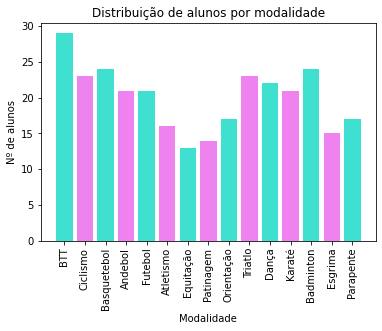

In [19]:
plotDistribPorModalidade(BD)

## Gráfico duma distribuição qualquer (exercício 9)

Especifica uma função que faz o plot dum gráfico com a distribuição passada como argumento.

Nota: Que parâmetros são necessários para ter uma função genérica que trace o gráfico para qualquer distribuição?


##### __Extra__: 
Para evitar sobreposição de nomes no eixo Ox, usar função *plt.xticks(rotation = 0)*, onde 0 corresponde ao ângulo no sentido anti-horário que se quer rodar.

In [20]:
import matplotlib.pyplot as plt
def plotDistrib(bd, index, oque):
    dist = distrib(bd, index)
    x = dist.keys()
    
    y = []
    for i in dist:
        y.append(dist[i])
    
    plt.bar(x, y, width = 0.8, color = ['red', 'orange'])
    plt.xlabel(oque)
    plt.xticks(rotation = 90) 
    plt.ylabel('Quantidade')
    plt.title('Distribuição')
    plt.show()
    


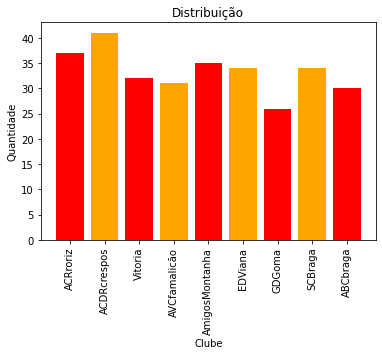

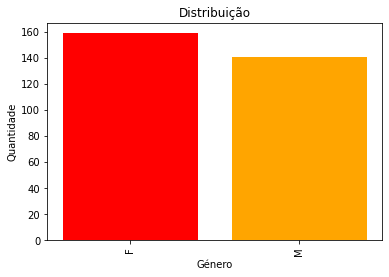

In [21]:
plotDistrib(BD, 7, "Clube")
plotDistrib(BD, 4, "Género")

## Interface Gráfica

In [22]:
import PySimpleGUI as sg

def janelaErro(mensagem):
    erro = [[sg.Text(mensagem)],[sg.Button("Ok")]]

    window = sg.Window("App", font = "Helvetiva 14", 
                   default_element_size=(20,1)).Layout(erro)

    stop = False
    while not stop:
        event, values = window.read()
        if event == "Ok" or event == sg.WIN_CLOSED:
            stop = True

    window.close()


In [26]:
import PySimpleGUI as sg

sg.theme("DarkRed2")

# Painel com duas colunas: 
# Coluna 1: menu
# Coluna 2: Dados
bd = []
dados=[]

interface = [[sg.Column([[sg.Text("Introduza a BD:"), sg.InputText(size = (15,1), key = "_bd")],
    [sg.Button("Carregar BD")],
    [sg.Button("Listar BD")],
    [sg.Button("Consultar um registo")],
    [sg.Button("Modalidades")],
    [sg.Button("Distribuição por modalidades")], 
    [sg.Button("Distribuição por clube")],
    [sg.Button("Distribuição por ano")],
    #[sg.Button("Gráfico da distribuição por modalidade")],
    [sg.Button("Sair")]]), sg.Listbox(values=dados, size=(50,50), key='_dados')]]


window = sg.Window("App", font = "Helvetiva 14", 
                   default_element_size=(20,1), size = (1000,500)).Layout(interface)

stop = False
while not stop:
    event, values = window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True
    
    elif event == "Carregar BD":
        #Falta verificar se o ficheiro existe
        bd = []
        bd = lerDataset(values['_bd'])
        dados.append("A BD foi carregada com sucesso!")
        window.find_element('_dados').Update(values=dados) #Atualizar ListBox
        
            
    elif event == "Listar BD":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            for e in bd:
                if e[-1]:
                    res = "Apto"
                else:
                    res = "Não"
                dados.append( e[0] + "  | " + e[2] + "  | " + e[1] + "  | " + res)
                window.find_element("_dados").Update(values=dados)
   

    elif event == "Consultar um registo":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            bd = lerDataset(values['_bd'])
            #Criar janela para pedir indice
            formLayout = [[sg.Text("Introduza o id do registo na forma emdXX:")],
              [sg.Text('Indice', size=(10, 1)), sg.InputText(key='_id')],
              [sg.Button('Inserir'), sg.Button('Cancelar')]]

            wform = sg.Window('Consulta de um registo', formLayout)
            inputEvent, inputValues = wform.read(close=True)
            wform.close()

            for e in bd:
                if e[0] == inputValues['_id']: #Indice inserido na janela sobreposta
                    if e[-1]:  
                        res = "Apto"
                    else:
                        res = "Não"

                    dados.append( e[0] + "  | " + e[2] + "  | " + e[1] + "  | " + res)
                    window.find_element("_dados").Update(values=dados)

    elif event == "Modalidades":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            bd = lerDataset(values['_bd'])
            for mod in modalidades(bd): #Percorrer lista de modalidades
                dados.append(mod)
                window.find_element("_dados").Update(values=dados)


    elif event == "Distribuição por modalidades":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            bd = lerDataset(values['_bd'])
            modalidades = distribPorModalidade(bd)
            for chave in modalidades.keys():
                valor = modalidades[chave]
                dados.append( chave + ": " + str(valor))
                window.find_element('_dados').Update(values = dados)

    elif event == "Distribuição por clube":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            bd = lerDataset(values['_bd'])
            cursos = distribPorClube(bd)
            for chave in cursos.keys():
                valor = cursos[chave]
                dados.append(chave + ": " + str(valor))
                window.find_element("_dados").Update(values=dados)
               

    elif event == "Distribuição por ano":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            bd = lerDataset(values['_bd'])
            anos = distribPorAno(bd)
            for chave in anos.keys():
                valor = anos[chave]
                dados.append(chave + ": " + str(valor))
                window.find_element("_dados").Update(values=dados)

    """
    elif event == "Gráfico da distribuição por modalidade":
        if len(bd) == 0:
            janelaErro("ERRO: Nenhuma base de dados foi carregada!")
        else:
            grafico = plotDistribPorModalidade(bd)
            dados.append(grafico)
            window.find_element("_dados").Update(values=dados)
    """

window.close()
